In [3]:
import numpy as np
import pandas as pd

In [8]:
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [9]:
from urllib.request import urlretrieve
urlretrieve(url, 'fremont.csv')

('fremont.csv', <http.client.HTTPMessage at 0x110bdae80>)

In [16]:
import pandas as pd


data = pd.read_csv('fremont.csv', index_col='Date', parse_dates=True)

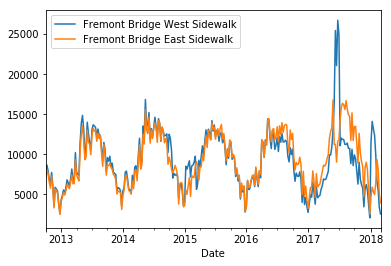

In [18]:
%matplotlib inline
data.resample('W').sum().plot()

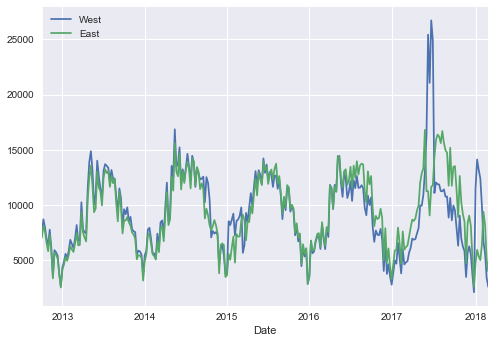

In [22]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
data.resample('W').sum().plot()

In [21]:
data.columns = ['West', 'East']

/Users/moe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 45194.656612318831)

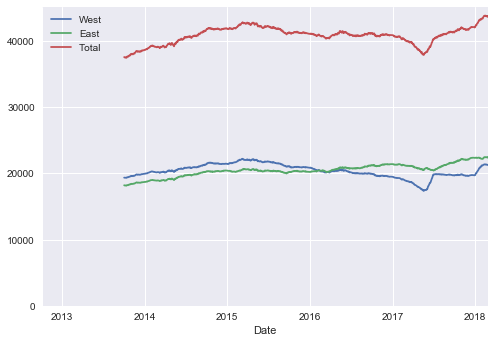

In [32]:
data['Total'] = data['West'] + data['East']

ax = data.resample('D').rolling(365).sum().plot()
ax.set_ylim(0, None)

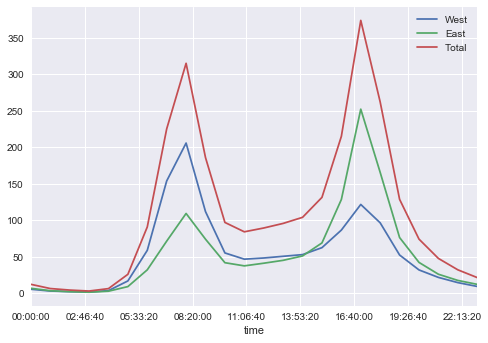

In [33]:
data.groupby(data.index.time).mean().plot()

In [34]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


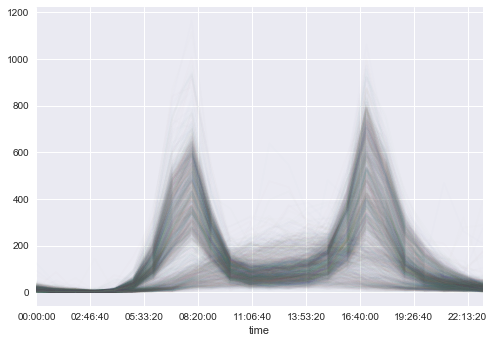

In [36]:
pivoted.plot(legend=False, alpha=0.01)